In [1]:
%endpoint http://query.wikidata.org/sparql
%format any
%display table
%show all

Endpoint set to: http://query.wikidata.org/sparql
Request format: ANY
Display: table
Result maximum size: unlimited

In [2]:
%pip install seaborn
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.display import display
from qwikidata.sparql import return_sparql_query_results

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



# Introduction.

The study aims at addressing the widely-discussed issue of whether a relationship exists between creativity and mental illness. It adopts a data-oriented approach, exploring information present on Wikidata ('a collaboratively edited multilingual knowledge graph hosted by the Wikimedia Foundation'). In particular, it retrieves and analyses data about renowned creators (artists, scientists, inventors etc.) and their mental health.

ADD INFO ABOUT STRUCTURE OF THE NOTEBOOK: STRUCTURE AND THEN DATA INVESTIGATION.

# A. Structure investigation: an insight into Wikidata hierarchy. 

In the following two paragraphs, we will analyse Wikidata structure in order to better specify which Classes and Subclasses we will take into account for our research. In particular, we will examine information about creative people and mental disorders and how it is recorded in the knowedge base.

# 1. Creativity.

To retrieve information about creative people, we examine data about people with a creative profession. On Wikidata, information about individuals' jobs can be found via the 'P106' (occupation) property, which connects each person with their profession. Professions are grouped into superclasses: for example, writers, actors and musicians are all considered subclasses of the class 'Artist'. In order to get an insight into the structure of the knowledge base and therefore be able to select the subclasses that will be most useful for our purpose, we ask Wikidata about the class ‘Creator’(Q2500638), which seems to be generic enough to provide information useful for our scopes. 


# The class 'Creator'

We retrieve all subclasses of the class 'creator via the following query.

In [14]:
select ?job ?jobLabel
where {?job wdt:P279  wd:Q2500638; #job is subclass of creator
            rdfs:label ?jobLabel. 
        FILTER (lang(?jobLabel) = "en")}

job,jobLabel
http://www.wikidata.org/entity/Q131062,urban planner
http://www.wikidata.org/entity/Q205375,inventor
http://www.wikidata.org/entity/Q482980,author
http://www.wikidata.org/entity/Q483501,artist
http://www.wikidata.org/entity/Q1294787,artisan
http://www.wikidata.org/entity/Q1954172,muse
http://www.wikidata.org/entity/Q3499072,chef
http://www.wikidata.org/entity/Q3630699,game designer
http://www.wikidata.org/entity/Q4479442,organizational founder
http://www.wikidata.org/entity/Q5096974,chief content officer


From the above table, we select some jobs of interest for our objectives: inventor (Q205375), director (Q3455803), innovator (Q3492227), author (Q482980), artist (Q483501), designer (Q5322166). 'Director' and 'Designer', though, are subclasses of 'Artist', so we will use this superclass to gather information about these specific occupations.

# The class 'Artist'.

The class 'Artist'(Q483501) - subclass of creator - seems very general. Let us ask Wikidata what its subclasses are, so that we can, again, select the ones that interest us most.

In [16]:
select ?job ?jobLabel
where {?job wdt:P279  wd:Q483501; #job is subclass of artist
            rdfs:label ?jobLabel. 
        FILTER (lang(?jobLabel) = "en")}

job,jobLabel
http://www.wikidata.org/entity/Q112811650,audiovisual artist
http://www.wikidata.org/entity/Q113217710,Māori artist
http://www.wikidata.org/entity/Q113950465,multi-artist
http://www.wikidata.org/entity/Q114244239,intermedia artist
http://www.wikidata.org/entity/Q117749889,galvanographer
http://www.wikidata.org/entity/Q122564989,worldbuilder
http://www.wikidata.org/entity/Q36180,writer
http://www.wikidata.org/entity/Q266569,animator
http://www.wikidata.org/entity/Q222344,cinematographer
http://www.wikidata.org/entity/Q639669,musician


From the above list, we exclude the following occupations, which seem  erratic or have more to do with mastering a technique than with creativity itself: bullfighter (Q549322), perfumer (Q579021), conferiencer (Q736415), exhibition curator (Q780596), make-up artist (Q935666), basket weaver (Q976015), impressionist (Q1148872), cast member (Q3297652), calligrapher (Q3303330), iconographer (Q4199058), epigone (Q1314618), starving artist (Q7602651), teaching artist (Q7691293), rybałt (Q9324259), hair make-up artist (Q11336353), imperial Household Artist (Q11481067), paleoartist (Q27890965), layout artist (Q28110454), clean-up artist (Q28813302), landscaper (Q43184282), illusionist (Q1658894).

# The class 'Author'

The class 'Author'(Q482980) - subclass of creator - seems very generic too. Let us ask Wikidata what its subclasses are, so that we can, again, select the ones that interest us most.

In [ ]:
select ?job ?jobLabel
where {?job wdt:P279  wd:Q2500638; #job is subclass of creator
            rdfs:label ?jobLabel. 
        FILTER (lang(?jobLabel) = "en")}

Based on the results, we exclude the following subclasses of author: poster (Q111651501), taxon author (Q113553809), glossator (Q1144638), broadcast writer (Q11499012), cartographic author (Q124514450), mufassir (Q12912932), exegete (Q21185790), redactor (Q2136129), programmer (Q5482740), blogger (Q8246794), dictionary author (Q88213697).

# Others.

Further analysing the chosen classes and their respective subclasses, we decide to discard some other occupations: non-fiction writer (Q15980158), journalists and linguists (Q108289407) editor (Q1607826), music teacher (Q2675537), model (Q4610556), content creator (Q109459317), entertainer (Q138858), professional wrestler (Q13474373), television presenter (Q947873), translator(Q333634), dub actor(Q11481802), pornographic actor(Q488111) and pornographic film director (Q17456089).

# 2. Mental disorders.

As we did for creativity, we identify a class that is generic enough to include information of interest regarding mental health.  'Mental disorder' and analyze its subclasses in order to get, once again, an insight into Wikidata's structure.

In [24]:
select ?disorder ?disLab
where {?disorder wdt:P279+  wd:Q12135; 
                rdfs:label ?disLab. 
        FILTER (lang(?disLab) = "en")}

disorder,disLab
http://www.wikidata.org/entity/Q44619,fear
http://www.wikidata.org/entity/Q105434,hypochondriasis
http://www.wikidata.org/entity/Q118418,antisocial personality disorder
http://www.wikidata.org/entity/Q11072,amnesia
http://www.wikidata.org/entity/Q18638,reduplicative paramnesia
http://www.wikidata.org/entity/Q18654,dissociative amnesia
http://www.wikidata.org/entity/Q175854,phobia
http://www.wikidata.org/entity/Q154430,anxiety
http://www.wikidata.org/entity/Q131755,bipolar disorder
http://www.wikidata.org/entity/Q182413,non-controlled substance abuse


In [3]:
all_disturbs = pd.read_csv('allDisturbs.csv')
pd.options.display.max_columns = None
pd.set_option('display.max_colwidth', None)
left_aligned_df = all_disturbs.style.set_properties(**{'text-align': 'left'})
left_aligned_df = left_aligned_df.set_table_styles(
    [dict(selector='th', props=[('text-align', 'left')])])
display(left_aligned_df)

,disorder,disLab
0,http://www.wikidata.org/entity/Q1001920,hallucinogen persisting perception disorder
1,http://www.wikidata.org/entity/Q1002195,autosomal recessive limb-girdle muscular dystrophy type 2K
2,http://www.wikidata.org/entity/Q1009193,counting disorders associated with genetic disease
3,http://www.wikidata.org/entity/Q1010522,gymnophobia
4,http://www.wikidata.org/entity/Q101245788,dementia with Lewy bodies
5,http://www.wikidata.org/entity/Q101402572,immature personality disorder
6,http://www.wikidata.org/entity/Q1019940,Borjeson-Forssman-Lehmann syndrome
7,http://www.wikidata.org/entity/Q102104887,neuronal intermediate filament inclusion disease
8,http://www.wikidata.org/entity/Q102186530,poor enunciation
9,http://www.wikidata.org/entity/Q102186555,insomnia with sleep apnea


# Mental disorders: class hierarchy.

In [ ]:
SELECT ?firstClassDisorderLabel (group_concat(DISTINCT ?secondClassDisorderLabel;separator=", ") as ?secondClassDisorders) (group_concat(DISTINCT ?lastClassLabel;separator=", ") as ?lastClassDisorders)
WHERE {?firstClassDisorder wdt:P279 wd:Q12135; rdfs:label ?firstClassDisorderLabel. 
	    OPTIONAL {?secondClassDisorder wdt:P279 ?firstClassDisorder; rdfs:label ?secondClassDisorderLabel.
		?lastClass wdt:P279 ?secondClassDisorder; rdfs:label ?lastClassLabel.
		FILTER (LANG(?secondClassDisorderLabel) = "en")
		FILTER (LANG(?lastClassLabel) = "en")}. 
        FILTER (LANG(?firstClassDisorderLabel) = "en") .
		
}
GROUP BY ?firstClassDisorderLabel 

In [3]:
mental_disturbs_hierarchy = pd.read_csv('mentalDisturbsHierarchy.csv')
pd.options.display.max_columns = None
pd.set_option('display.max_colwidth', None)
left_aligned_df = mental_disturbs_hierarchy.style.set_properties(**{'text-align': 'left'})
left_aligned_df = left_aligned_df.set_table_styles(
    [dict(selector='th', props=[('text-align', 'left')])])
display(left_aligned_df)


,firstClassDisorderLabel,secondClassDisorders,lastClassDisorders
0,adjustment disorder,"maladjustment, hospitalism, culture shock","spoiled person, quasi-autism, anaclitic depression, Jerusalem syndrome"
1,anxiety,"phobia, fear, mathematical anxiety, eco-anxiety","kinesiophobia, social anxiety disorder, driving phobia, childhood fear, childhood phobia, heptadecaphobia, acalculia, collective fear, numerophobia, chromophobia, tokophobia, tetraphobia, Mathematical disorder, Fear of Being Offline, Ecophobia, dyscalculia, fear of commitment, Climate psychosis, Red Scare, trypophobia, apeirophobia, agoraphobia, specific phobia, triskaidekaphobia, phobia, bathmophobia, negrophobia, ombrophobia, surdophobia, Fear of God, abandonment anxiety, amaxophobia, test anxiety, theophobia, afrophobia, phallophobia, loss aversion"
2,arithmomania,nan,nan
3,At risk mental state,nan,nan
4,autovampirism,nan,nan
5,bipolar and related disorders,bipolar spectrum,schizoaffective disorder
6,body-focused repetitive behavior disorders,"excoriation disorder, nail biting, trichotillomania","Factitious dermatitis, perionychophagia, Excoriated acne, Onychotillomania, trichophagia"
7,challenges in planning or solving problems,nan,nan
8,cognitive disorder,"anxiety disorder, dementia, cognitive deficit, amnesia, Delirium, cognitive dysfunction, psychotic disorder, prosopagnosia","cluster C personality disorder, senile dementia, frontotemporal dementia, post-traumatic stress disorder, Subcortical dementia, obsessive-compulsive disorder, intellectual disability, separation anxiety disorder, rapidly progressive dementia, substance-induced anxiety disorder, Early onset dementia, borderline intellectual functioning, Transient epileptic amnesia, Hypermerimna, social anxiety disorder, Godot's syndrome, transient global amnesia, dissociative amnesia, psychopharmacological delirium, Lewy body dementia, presenile dementia, school refusal, delirium acutum, Guadeloupean parkinsonism, retrograde amnesia, drug-induced persisting amnestic disease, drug-induced delirium, subacute delirium, post ICU amnesia, neurotic disorder, delirium tremens, phobia, mixed dementia, lovesickness, acute stress reaction, fear of intimacy, death anxiety, Complications of traumatic brain injury, anterograde amnesia, cognitive inertia, anxiety neurosis, childhood amnesia, vascular dementia, Drug-induced amnesia, Intensive care unit delirium, fixation amnesia, schizophrenia, selective mutism, panic disorder, Memory erasure, neurosyphilis, Pseudosenility, fugue state, mixed anxiety-depressive disorder, Katagelasticism, body-focused obsession, Limbic-predominant age-related TDP-43 encephalopathy, schizoaffective disorder, neurodegenerative disease with dementia, Lacunar amnesia, bradyphrenia, organic anxiety disorder, posterior cortical atrophy, genetic dementia, cerebrovascular dementia, character amnesia, sundowning, stranger anxiety, Skumin syndrome, muttering delirium, selective memory loss, generalized anxiety disorder, infectious disease with dementia, cortical dementia, presbyophrenia, prosopagnosia, hereditary, source amnesia, oneirism, diffuse neurofibrillary tangles with calcification"
9,confusion with time and space,topographical agnosia,Developmental topographical disorientation


# Number of people on Wikidata.

Our first query is about how many people are present on Wikidata. 

In [12]:
SELECT (COUNT(?person) AS ?peopleCount)
WHERE {
	?person wdt:P31/wdt:P279* wd:Q5  .
}

peopleCount
11133814


# 3. Counting creative people on Wikidata

Given the occupations we have selected, we now ask Wikidata about the number of 'creative people' (i.e. people who have a 'creative job') it contains.

In [ ]:
SELECT (COUNT(DISTINCT ?creativePerson) as ?creativeCount)
where {
  ?creativePerson wdt:P31 wd:Q5.
  ?creativePerson  wdt:P106 ?occupation .
  {?occupation wdt:P279+ wd:Q205375}  UNION {?occupation wdt:P279+ wd:Q3492227} UNION {?occupation wdt:P279+ wd:Q482980} UNION {?occupation wdt:P279+ wd:Q483501}
  MINUS {?occupation wdt:P279+ wd:Q549322} 
  MINUS {?occupation wdt:P279+ wd:Q579021} 
  MINUS {?occupation wdt:P279+ wd:Q736415} 
  MINUS {?occupation wdt:P279+ wd:Q780596} 
  MINUS {?occupation wdt:P279+ wd:Q935666}
  MINUS {?occupation wdt:P279+ wd:Q976015} 
  MINUS {?occupation wdt:P279+ wd:Q1148872} 
  MINUS {?occupation wdt:P279+ wd:Q3297652} 
  MINUS {?occupation wdt:P279+ wd:Q3303330}
  MINUS {?occupation wdt:P279+ wd:Q4199058} 
  MINUS {?occupation wdt:P279+ wd:Q1314618} 
  MINUS {?occupation wdt:P279+ wd:Q7602651}
  MINUS {?occupation wdt:P279+ wd:Q7691293}
  MINUS {?occupation wdt:P279+ wd:Q9324259}
  MINUS {?occupation wdt:P279+ wd:Q11336353} 
  MINUS {?occupation wdt:P279+ wd:Q11481067}
  MINUS {?occupation wdt:P279+ wd:Q27890965}
  MINUS {?occupation wdt:P279+ wd:Q28110454}
  MINUS {?occupation wdt:P279+ wd:Q28813302}
  MINUS {?occupation wdt:P279+ wd:Q43184282}
  MINUS {?occupation wdt:P279+ wd:Q1658894}
  MINUS {?occupation wdt:P279+ wd:Q15980158} 
  MINUS {?occupation wdt:P279+ wd:Q1607826} 
  MINUS {?occupation wdt:P279+ wd:Q2675537} 
  MINUS {?occupation wdt:P279+ wd:Q4610556} 
  MINUS {?occupation wdt:P279+ wd:Q109459317} 
  MINUS {?occupation wdt:P279+ wd:Q138858} 
  MINUS {?occupation wdt:P279+ wd:Q1930187} 
}  

The result is **1,993,611**. Comapred with the total number of people on Wikidata (11,133,814), it is the 17.9%.

# Data visualization: creative people on Wikidata

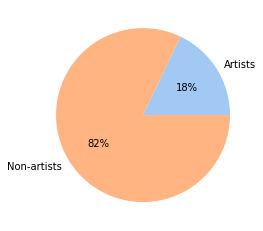

In [23]:
#define data
data = [17.9, 82.1]
labels = ['Creative people', 'Non-Creative people']

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

# 4. The most represented creative professions on Wikidata

In [ ]:
SELECT DISTINCT ?occupation (count (distinct ?creativePerson) as ?creativeCount)
where {
  ?creativePerson wdt:P31 wd:Q5.
  ?creativePerson  wdt:P106 ?occupation.
  {?occupation wdt:P279+ wd:Q205375}  UNION {?occupation wdt:P279+ wd:Q3492227} UNION {?occupation wdt:P279+ wd:Q482980} UNION {?occupation wdt:P279+ wd:Q483501}
 MINUS {?occupation wdt:P279+ wd:Q549322} 
  MINUS {?occupation wdt:P279+ wd:Q579021} 
  MINUS {?occupation wdt:P279+ wd:Q736415} 
  MINUS {?occupation wdt:P279+ wd:Q780596} 
  MINUS {?occupation wdt:P279+ wd:Q935666}
  MINUS {?occupation wdt:P279+ wd:Q976015} 
  MINUS {?occupation wdt:P279+ wd:Q1148872} 
  MINUS {?occupation wdt:P279+ wd:Q3297652} 
  MINUS {?occupation wdt:P279+ wd:Q3303330}
  MINUS {?occupation wdt:P279+ wd:Q4199058} 
  MINUS {?occupation wdt:P279+ wd:Q1314618} 
  MINUS {?occupation wdt:P279+ wd:Q7602651}
  MINUS {?occupation wdt:P279+ wd:Q7691293}
  MINUS {?occupation wdt:P279+ wd:Q9324259}
  MINUS {?occupation wdt:P279+ wd:Q11336353} 
  MINUS {?occupation wdt:P279+ wd:Q11481067}
  MINUS {?occupation wdt:P279+ wd:Q27890965}
  MINUS {?occupation wdt:P279+ wd:Q28110454}
  MINUS {?occupation wdt:P279+ wd:Q28813302}
  MINUS {?occupation wdt:P279+ wd:Q43184282}
  MINUS {?occupation wdt:P279+ wd:Q1658894}
  MINUS {?occupation wdt:P279+ wd:Q15980158} 
  MINUS {?occupation wdt:P279+ wd:Q1607826} 
  MINUS {?occupation wdt:P279+ wd:Q2675537} 
  MINUS {?occupation wdt:P279+ wd:Q4610556} 
  MINUS {?occupation wdt:P279+ wd:Q109459317} 
  MINUS {?occupation wdt:P279+ wd:Q138858} 
  MINUS {?occupation wdt:P279+ wd:Q1930187} 
}  
GROUP BY ?occupation
ORDER BY desc (?creativeCount)


| Occupation | Count| 
|:--------:|:--------:|
|  Writer  |  358,859 | 
|  Actor   |  325,264 |  
|  Painter |  201,211 | 
|  Poet    |  114,395| 
|  Singer  |  109,818 |  
|  Composer|  104,892| 
|  Musician|  91,485| 
|Film director| 83,558|
|Screenwriter| 76,278|
|Film actor | 72,287|

# The most common mental disorders on Wikidata

In [ ]:
SELECT ?disorderLabel (count(distinct ?person) as ?personNumber)
WHERE {
      ?person wdt:P31 wd:Q5.
      ?person wdt:P1050 ?disorder.
      ?disorder wdt:P279+ wd:Q12135.
      ?disorder rdfs:label ?disorderLabel.
      FILTER (lang(?disorderLabel) = "en")
      
}
GROUP BY ?disorderLabel
ORDER BY DESC (?personNumber)

In [18]:
most_common_disorders = pd.read_csv('mostCommonDisorders.csv')
pd.options.display.max_columns = None
display(most_common_disorders)

,disorderLabel,personNumber
0,bipolar disorder,376
1,dyslexia,289
2,autism,265
3,stuttering,190
4,schizophrenia,134
5,Asperger syndrome,131
6,attention deficit hyperactivity disorder,120
7,mental depression,115
8,alcoholism,67
9,dementia,57


# Disorders and their superclasses: investigating Wikidata hierarchy

The result is messy: different levels/groups of disorders are mixed up. W e further investigate on the structure of Wikidata by asking the second-level class of each disturb (the taxonomy is mental disorder -- second level class -- * an indefined number of classes*-- our disturb). 

In [ ]:
SELECT (group_concat(DISTINCT ?superDisorderLabel ;separator=", ") as ?superClasses) ?disorderLabel (count(distinct ?person) as ?personNumber) 

WHERE {
      ?person wdt:P31 wd:Q5.
      ?person wdt:P1050 ?disorder.
      ?disorder rdfs:label ?disorderLabel.
	  ?disorder wdt:P279+  ?superDisorder.
	  ?superDisorder wdt:P279 wd:Q12135.
	  ?superDisorder rdfs:label ?superDisorderLabel.
      FILTER (lang(?disorderLabel) = "en")
      FILTER (lang(?superDisorderLabel) = "en")
}
GROUP BY ?disorderLabel
ORDER BY DESC (?personNumber)

In [17]:
disturbs_superclasses = pd.read_csv('disturbsSuperClassesCount.csv')
pd.options.display.max_columns = None
pd.set_option('display.max_colwidth', None)
left_aligned_df = disturbs_superclasses.style.set_properties(**{'text-align': 'left'})
left_aligned_df = left_aligned_df.set_table_styles(
    [dict(selector='th', props=[('text-align', 'left')])])
display(left_aligned_df)


,superClasses,disorderLabel,personNumber
0,mood disorder,bipolar disorder,376
1,"developmental disorder, mental disorder diagnosed in childhood, specific developmental disorder",dyslexia,289
2,"developmental disorder, mental disorder diagnosed in childhood",autism,265
3,"developmental disorder, mental disorder diagnosed in childhood, specific developmental disorder",stuttering,190
4,"organic or symptomatic mental disorder, cognitive disorder, spectrum disorder",schizophrenia,134
5,"developmental disorder, mental disorder diagnosed in childhood",Asperger syndrome,131
6,"emotional and behavioral disorders, developmental disorder, mental disorder diagnosed in childhood, specific developmental disorder",attention deficit hyperactivity disorder,120
7,mood disorder,mental depression,115
8,"organic or symptomatic mental disorder, substance use disorder",alcoholism,67
9,"organic or symptomatic mental disorder, developmental disorder, cognitive disorder, mental disorder diagnosed in childhood, specific developmental disorder",dementia,57


# The most common classes of disorders.

In [ ]:
SELECT  ?disorderClassLabel (count(distinct ?person) as ?personNumber) (group_concat(DISTINCT ?disorderLabel ;separator=", ") as ?disorders)

WHERE {
      ?person wdt:P31 wd:Q5.
	  ?person wdt:P1050 ?disorder.
      ?disorder wdt:P279+ ?disorderClass.
      ?disorderClass wdt:P279 wd:Q12135.
      ?disorderClass rdfs:label ?disorderClassLabel.
	  ?disorder rdfs:label ?disorderLabel.
      FILTER (lang(?disorderClassLabel) = "en")
	  FILTER (lang(?disorderLabel) = "en")
}
GROUP BY ?disorderClassLabel
ORDER BY DESC (?personNumber)

In [16]:
most_common_disorder_classes = pd.read_csv('mostCommonClasses.csv')
pd.options.display.max_columns = None
pd.set_option('display.max_colwidth', None)
left_aligned_df = most_common_disorder_classes.style.set_properties(**{'text-align': 'left'})
left_aligned_df = left_aligned_df.set_table_styles(
    [dict(selector='th', props=[('text-align', 'left')])])
display(left_aligned_df)

,disorderClassLabel,personNumber,disorders
0,developmental disorder,1172,"autism, stuttering, dyslexia, frontotemporal dementia, Tourette syndrome, prosopagnosia, Asperger syndrome, aphasia, dementia, Huntington's disease, intellectual disability, autism spectrum disorder, deaf-mute, dyscalculia, attention deficit hyperactivity disorder, hyperlexia, developmental coordination disorder, anorexia nervosa, pervasive developmental disorder not otherwise specified, muteness, aphonia, Wiedemann-Rautenstrauch syndrome, disability affecting intellectual abilities, Attention deficit hyperactivity disorder predominantly inattentive, progressive supranuclear palsy, pervasive developmental disorder, savant syndrome, lipoid proteinosis, Non-Verbal Learning Disorder, vascular dementia, bulimia nervosa, Foreign accent syndrome, oppositional defiant disorder, selective mutism, Creutzfeldt-Jakob disease, mild intellectual disabilty, Joubert syndrome, lisp, alcohol-related neurodevelopmental disorder, Williams-Beuren syndrome, atypical autism, eating disorder, focal dermal hypoplasia, fetal alcohol syndrome, conduct disorder, Binge eating disorder, dementia with Lewy bodies, apperceptive agnosia, XXXY syndrome, frontotemporal degeneration with dementia, Lewy body dementia, autistic savant, learning disability, coprolalia, corticobasal degeneration, neurosyphilis, speech disorder, Hallermann-Streiff syndrome, high-functioning autism, Language-based learning disability, feeble-minded, primary progressive aphasia"
1,mental disorder diagnosed in childhood,1172,"dyscalculia, stuttering, dyslexia, attention deficit hyperactivity disorder, anorexia nervosa, selective mutism, Asperger syndrome, autism, autism spectrum disorder, prosopagnosia, deaf-mute, vascular dementia, dementia, Huntington's disease, developmental coordination disorder, Tourette syndrome, oppositional defiant disorder, Foreign accent syndrome, frontotemporal dementia, focal dermal hypoplasia, bulimia nervosa, aphasia, Binge eating disorder, hyperlexia, XXXY syndrome, intellectual disability, apperceptive agnosia, primary progressive aphasia, pervasive developmental disorder not otherwise specified, muteness, disability affecting intellectual abilities, Lewy body dementia, autistic savant, Hallermann-Streiff syndrome, neurosyphilis, coprolalia, fetal alcohol syndrome, Non-Verbal Learning Disorder, Wiedemann-Rautenstrauch syndrome, aphonia, lisp, eating disorder, savant syndrome, Attention deficit hyperactivity disorder predominantly inattentive, Williams-Beuren syndrome, Joubert syndrome, alcohol-related neurodevelopmental disorder, progressive supranuclear palsy, Creutzfeldt-Jakob disease, atypical autism, lipoid proteinosis, dementia with Lewy bodies, pervasive developmental disorder, conduct disorder, mild intellectual disabilty, frontotemporal degeneration with dementia, high-functioning autism, Language-based learning disability, learning disability, speech disorder, feeble-minded, corticobasal degeneration"
2,specific developmental disorder,826,"frontotemporal dementia, intellectual disability, stuttering, dyslexia, attention deficit hyperactivity disorder, Huntington's disease, aphonia, bulimia nervosa, Non-Verbal Learning Disorder, deaf-mute, anorexia nervosa, dementia, prosopagnosia, developmental coordination disorder, Tourette syndrome, Wiedemann-Rautenstrauch syndrome, dyscalculia, muteness, aphasia, vascular dementia, selective mutism, neurosyphilis, Language-based learning disability, Lewy body dementia, fetal alcohol syndrome, Attention deficit hyperactivity disorder predominantly inattentive, corticobasal degeneration, speech disorder, feeble-minded, learning disability, primary progressive aphasia, oppositional defiant disorder, Hallermann-Streiff syndrome, coprolalia, Foreign accent syndrome, lisp, Joubert syndrome, Creutzfeldt-Jakob disease, alcohol-related neurodevelopmental disorder, progressive supranuclear palsy, Williams-Beuren syndrome, XXXY syndrome, frontot

# Total number of people affected by mental disorders.

In [ ]:
SELECT  (COUNT (DISTINCT ?person) as ?peopleCount) 
WHERE { 
  ?person wdt:P31 wd:Q5. 
  ?person wdt:P1050 ?disorder.
  ?disorder wdt:P279+ wd:Q12135.
}  

**2,108**

# Total number of creative people affected by mental disorders

In [ ]:
PREFIX wd: <http://www.wikidata.org/entity/>
PREFIX wdt: <http://www.wikidata.org/prop/direct/>
SELECT (COUNT(DISTINCT ?creativePerson) as ?creativeCount)
where {
  ?creativePerson wdt:P31 wd:Q5.
  ?creativePerson wdt:P1050 ?disorder.
  ?disorder wdt:P279+ wd:Q12135.
  ?creativePerson  wdt:P106 ?occupation .
  {?occupation wdt:P279+ wd:Q205375}  UNION {?occupation wdt:P279+ wd:Q3492227} UNION {?occupation wdt:P279+ wd:Q482980} UNION {?occupation wdt:P279+ wd:Q483501}
  MINUS {?occupation wdt:P279+ wd:Q549322} 
  MINUS {?occupation wdt:P279+ wd:Q579021} 
  MINUS {?occupation wdt:P279+ wd:Q736415} 
  MINUS {?occupation wdt:P279+ wd:Q780596} 
  MINUS {?occupation wdt:P279+ wd:Q935666}
  MINUS {?occupation wdt:P279+ wd:Q976015} 
  MINUS {?occupation wdt:P279+ wd:Q1148872} 
  MINUS {?occupation wdt:P279+ wd:Q3297652} 
  MINUS {?occupation wdt:P279+ wd:Q3303330}
  MINUS {?occupation wdt:P279+ wd:Q4199058} 
  MINUS {?occupation wdt:P279+ wd:Q1314618} 
  MINUS {?occupation wdt:P279+ wd:Q7602651}
  MINUS {?occupation wdt:P279+ wd:Q7691293}
  MINUS {?occupation wdt:P279+ wd:Q9324259}
  MINUS {?occupation wdt:P279+ wd:Q11336353} 
  MINUS {?occupation wdt:P279+ wd:Q11481067}
  MINUS {?occupation wdt:P279+ wd:Q27890965}
  MINUS {?occupation wdt:P279+ wd:Q28110454}
  MINUS {?occupation wdt:P279+ wd:Q28813302}
  MINUS {?occupation wdt:P279+ wd:Q43184282}
  MINUS {?occupation wdt:P279+ wd:Q1658894}
  MINUS {?occupation wdt:P279+ wd:Q15980158} 
  MINUS {?occupation wdt:P279+ wd:Q1607826} 
  MINUS {?occupation wdt:P279+ wd:Q2675537} 
  MINUS {?occupation wdt:P279+ wd:Q4610556} 
  MINUS {?occupation wdt:P279+ wd:Q109459317} 
  MINUS {?occupation wdt:P279+ wd:Q138858} 
  MINUS {?occupation wdt:P279+ wd:Q1930187} 
}  

**1,328**

# Data visualization: artists affected by mental disorders - total of people affected by mental disorders

Although only 2.108 people on Wikidata are reported to be affected by mental disorders, 1.328 of them have some kind of creative profession: more than half of them (63%)!

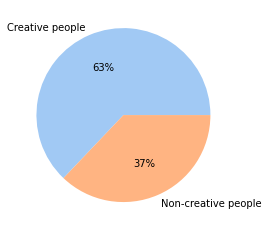

In [42]:
#define data
data = [62.9, 37.1]
labels = ['Creative people', 'Non-creative people']

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

# Artists, disorders and occupations.

In [ ]:
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX wikibase: <http://wikiba.se/ontology#>
PREFIX wd: <http://www.wikidata.org/entity/>
PREFIX wdt: <http://www.wikidata.org/prop/direct/>
SELECT DISTINCT ?artistLabel (group_concat(DISTINCT ?disorderLabel; separator=", ") as ?medicalConditions) (group_concat(DISTINCT ?disorderClassLabel; separator=", ") as ?disorderClasses)  (group_concat(DISTINCT ?occupationLabel; separator=", ") as ?occupations)
WHERE {
      ?artist wdt:P106 ?occupation .
      ?artist rdfs:label ?artistLabel .
	  ?occupation wdt:P279+ wd:Q483501.
      ?occupation rdfs:label ?occupationLabel.
	  {?occupation wdt:P279+ wd:Q205375}  UNION {?occupation wdt:P279+ wd:Q3492227} UNION {?occupation wdt:P279+ wd:Q482980} UNION {?occupation wdt:P279+ wd:Q483501}
      MINUS {?occupation wdt:P279+ wd:Q549322} 
      MINUS {?occupation wdt:P279+ wd:Q579021} 
      MINUS {?occupation wdt:P279+ wd:Q736415} 
      MINUS {?occupation wdt:P279+ wd:Q780596} 
      MINUS {?occupation wdt:P279+ wd:Q935666}
      MINUS {?occupation wdt:P279+ wd:Q976015} 
      MINUS {?occupation wdt:P279+ wd:Q1148872} 
      MINUS {?occupation wdt:P279+ wd:Q3297652} 
      MINUS {?occupation wdt:P279+ wd:Q3303330}
      MINUS {?occupation wdt:P279+ wd:Q4199058} 
      MINUS {?occupation wdt:P279+ wd:Q1314618} 
      MINUS {?occupation wdt:P279+ wd:Q7602651}
      MINUS {?occupation wdt:P279+ wd:Q7691293}
      MINUS {?occupation wdt:P279+ wd:Q9324259}
      MINUS {?occupation wdt:P279+ wd:Q11336353} 
      MINUS {?occupation wdt:P279+ wd:Q11481067}
      MINUS {?occupation wdt:P279+ wd:Q27890965}
      MINUS {?occupation wdt:P279+ wd:Q28110454}
      MINUS {?occupation wdt:P279+ wd:Q28813302}
      MINUS {?occupation wdt:P279+ wd:Q43184282}
      MINUS {?occupation wdt:P279+ wd:Q1658894}
      MINUS {?occupation wdt:P279+ wd:Q15980158} #non-fiction writer
      MINUS {?occupation wdt:P279+ wd:Q1607826} #editor
      MINUS {?occupation wdt:P279+ wd:Q2675537} #music teacher
      MINUS {?occupation wdt:P279+ wd:Q4610556} #model
      MINUS {?occupation wdt:P279+ wd:Q109459317} #content creator
      MINUS {?occupation wdt:P279+ wd:Q138858} #entertainer
      MINUS {?occupation wdt:P279+ wd:Q1930187} 
      ?artist wdt:P1050 ?disorder.
	  ?disorder wdt:P279+ ?disorderClass.
      ?disorderClass wdt:P279 wd:Q12135.
      ?disorderClass rdfs:label ?disorderClassLabel.
      ?disorder rdfs:label ?disorderLabel.
      FILTER (lang(?disorderLabel) = "en")
	  FILTER (LANG(?occupationLabel) = "en") .
      FILTER (LANG(?artistLabel) = "en") .
	  FILTER (LANG(?disorderClassLabel) = "en") .
      
        }
GROUP BY ?artistLabel  

In [45]:
artists_disorders_occupations = pd.read_csv('ArtistsDisordersOccupations.csv')
pd.options.display.max_columns = None
pd.set_option('display.max_colwidth', None)
left_aligned_df = artists_disorders_occupations.style.set_properties(**{'text-align': 'left'})
left_aligned_df = left_aligned_df.set_table_styles(
    [dict(selector='th', props=[('text-align', 'left')])])
display(left_aligned_df)

,artistLabel,medicalConditions,disorderClasses,occupations
0,2-D,substance dependence,"organic or symptomatic mental disorder, substance use disorder","keyboardist, singer"
1,Aaron Carter,"bipolar disorder, schizophrenia","mood disorder, organic or symptomatic mental disorder, cognitive disorder, spectrum disorder","rapper, singer, film actor, television actor, actor, songwriter"
2,Aaron Paul Orsini,autism,"developmental disorder, mental disorder diagnosed in childhood","writer, composer"
3,Aart van der Leeuw,dyslexia,"developmental disorder, mental disorder diagnosed in childhood, specific developmental disorder","poet, writer"
4,Abbie Hoffman,bipolar disorder,mood disorder,writer
5,Abhinaya,deaf-mute,"developmental disorder, psychopathological syndrome, mental disorder diagnosed in childhood, specific developmental disorder",actor
6,Abhishek Bachchan,dyslexia,"developmental disorder, mental disorder diagnosed in childhood, specific developmental disorder","film actor, television presenter"
7,Ace Kefford,bipolar disorder,mood disorder,bass guitarist
8,Adalgisa Nery,mental depression,mood disorder,"poet, novelist, writer"
9,Adam Ant,bipolar disorder,mood disorder,"designer, singer, composer, guitarist, stage actor, actor, film actor"


In [ ]:
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX wikibase: <http://wikiba.se/ontology#>
PREFIX wd: <http://www.wikidata.org/entity/>
PREFIX wdt: <http://www.wikidata.org/prop/direct/>
SELECT DISTINCT ?occupationLabel ?disorderLabel (count (distinct ?artist) as ?artistsNum) 
WHERE {
      ?artist wdt:P106 ?occupation .
	  ?occupation wdt:P279+ wd:Q483501.
      ?occupation rdfs:label ?occupationLabel.
	  {?occupation wdt:P279+ wd:Q205375}  UNION {?occupation wdt:P279+ wd:Q3492227} UNION {?occupation wdt:P279+ wd:Q482980} UNION {?occupation wdt:P279+ wd:Q483501}  
      ?artist wdt:P1050 ?disorder.
	  ?disorder wdt:P279+ wd:Q12135.
	  ?disorder rdfs:label ?disorderLabel.
      ?disorderClass wdt:P279 wd:Q12135.
	  MINUS {?occupation wdt:P279+ wd:Q549322} 
      MINUS {?occupation wdt:P279+ wd:Q579021} 
      MINUS {?occupation wdt:P279+ wd:Q736415} 
      MINUS {?occupation wdt:P279+ wd:Q780596} 
      MINUS {?occupation wdt:P279+ wd:Q935666}
      MINUS {?occupation wdt:P279+ wd:Q976015} 
      MINUS {?occupation wdt:P279+ wd:Q1148872} 
      MINUS {?occupation wdt:P279+ wd:Q3297652} 
      MINUS {?occupation wdt:P279+ wd:Q3303330}
      MINUS {?occupation wdt:P279+ wd:Q4199058} 
      MINUS {?occupation wdt:P279+ wd:Q1314618} 
      MINUS {?occupation wdt:P279+ wd:Q7602651}
      MINUS {?occupation wdt:P279+ wd:Q7691293}
      MINUS {?occupation wdt:P279+ wd:Q9324259}
      MINUS {?occupation wdt:P279+ wd:Q11336353} 
      MINUS {?occupation wdt:P279+ wd:Q11481067}
      MINUS {?occupation wdt:P279+ wd:Q27890965}
      MINUS {?occupation wdt:P279+ wd:Q28110454}
      MINUS {?occupation wdt:P279+ wd:Q28813302}
      MINUS {?occupation wdt:P279+ wd:Q43184282}
      MINUS {?occupation wdt:P279+ wd:Q1658894}
      MINUS {?occupation wdt:P279+ wd:Q15980158} 
      MINUS {?occupation wdt:P279+ wd:Q1607826} 
      MINUS {?occupation wdt:P279+ wd:Q2675537} 
      MINUS {?occupation wdt:P279+ wd:Q4610556} 
      MINUS {?occupation wdt:P279+ wd:Q109459317} 
      MINUS {?occupation wdt:P279+ wd:Q138858} 
      MINUS {?occupation wdt:P279+ wd:Q1930187} 
      FILTER (lang(?disorderLabel) = "en")
	  FILTER (LANG(?occupationLabel) = "en") .
	  }        
GROUP BY ?occupationLabel ?disorderLabel 
ORDER BY DESC(?artistsNum) 

In [96]:
artists_professions_disturbs = pd.read_csv('artistsProfessionsDisturbs.csv')
pd.options.display.max_columns = None
pd.set_option('display.max_colwidth', None)
left_aligned_df = artists_professions_disturbs.style.set_properties(**{'text-align': 'left'})
left_aligned_df = left_aligned_df.set_table_styles(
    [dict(selector='th', props=[('text-align', 'left')])])
display(left_aligned_df)

,occupationLabel,disorderLabel,artistsNum
0,actor,bipolar disorder,76
1,actor,dyslexia,70
2,singer,bipolar disorder,64
3,writer,bipolar disorder,62
4,writer,autism,60
5,writer,dyslexia,52
6,film actor,dyslexia,48
7,film actor,bipolar disorder,45
8,singer,dyslexia,45
9,television actor,bipolar disorder,45


In [97]:
def change_occupation_names(occupation):
    if 'actor' in occupation:
        return 'actor'
    else:
        return occupation

In [98]:
artists_professions_disturbs["occupationLabel"] = artists_professions_disturbs["occupationLabel"].apply(change_occupation_names)

In [99]:
artists_professions_disturbs.head(15)

,occupationLabel,disorderLabel,artistsNum
0,actor,bipolar disorder,76
1,actor,dyslexia,70
2,singer,bipolar disorder,64
3,writer,bipolar disorder,62
4,writer,autism,60
5,writer,dyslexia,52
6,actor,dyslexia,48
7,actor,bipolar disorder,45
8,singer,dyslexia,45
9,actor,bipolar disorder,45


In [100]:
artists_professions_disturbs = artists_professions_disturbs.groupby(['occupationLabel', 'disorderLabel']).agg({'artistsNum': "sum"})

In [105]:
artists_professions_disturbs.head(50)

artistsNum
occupationLabel disorderLabel                                                                 
DJ producer     Tourette syndrome                                                            1
                attention deficit hyperactivity disorder                                     2
                autism                                                                       2
                developmental coordination disorder                                          1
                lisp                                                                         1
Dungeon Master  alcohol dependence                                                           1
                cannabis dependence                                                          1
actor           Asperger syndrome                                                           48
                Attention deficit hyperactivity disorder predominantly inattentive           4
                Binge eating disorder                                                        2
                Hallermann-Streiff syndrome                                                  1
                Huntington's disease                                                         3
                Joubert syndrome                                                             2
                Korsakoff's syndrome                                                         1
                Lewy body dementia                                                           8
                Non-Verbal Learning Disorder                                                 4
                REM sleep behavior disorder                                                  1
                Tourette syndrome                                                           12
                Williams-Beuren syndrome                                                     1
                Wilson disease                                                               1
                XXXY syndrome                                                                1
                agoraphobia                                                                  4
                alcohol abuse                                                                2
                alcohol dependence                                                           3
                alcoholism                                                                  27
                anorexia nervosa                                                             4
                antisocial personality disorder                                              2
                anxiety                                                                      2
                anxiety disorder                                                             6
                aphasia                                                                      4
                aphonia                                                                      1
                attention deficit hyperactivity disorder                                    78
                atypical autism                                                              1
                autism                                                                      63
                autism spectrum disorder                                                     9
                bipolar disorder                                                           203
                body dysmorphic disorder                                                     7
                borderline personality disorder                                             13
                bulimia nervosa                                                              3
                chronic depressive disorder                                                  2
                cocaine dependence                                                           2

In [95]:
test = artists_professions_disturbs.sort_values(['artistsNum'], ascending=[False])
test.head(20)

artistsNum
occupationLabel disorderLabel                                       
actor           dyslexia                                         204
                bipolar disorder                                 203
                stuttering                                       133
                mental depression                                 80
                attention deficit hyperactivity disorder          78
singer          bipolar disorder                                  64
actor           autism                                            63
writer          bipolar disorder                                  62
                autism                                            60
                dyslexia                                          52
actor           Asperger syndrome                                 48
singer          dyslexia                                          45
actor           obsessive-compulsive disorder                     45
                schizophrenia                                     42
writer          stuttering                                        38
musician        bipolar disorder                                  36
composer        bipolar disorder                                  34
writer          Asperger syndrome                                 33
songwriter      bipolar disorder                                  32
screenwriter    bipolar disorder                                  31